In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from scipy.io.wavfile import write
import speech_recognition as sr
from audiomentations import Compose, AddGaussianNoise, PitchShift, HighPassFilter
import soundfile as sf

In [2]:
import pyttsx3

In [3]:
engine = pyttsx3.init('sapi5')
voices = engine.getProperty('voices')
# print(voices[1].id)
engine.setProperty('voice', voices[0].id)


def speak(audio):
    engine.say(audio)
    engine.runAndWait()


In [4]:
from pydub import AudioSegment

In [5]:
import pandas as pd

In [80]:
#! pip install librosa
#! pip install mir_eval
import librosa
import librosa.display as dsp
import mir_eval
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np

In [81]:
metadata=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\metadata.csv")

In [82]:
metadata

,class,location,total
0,chiranjeevi original-,F:\project\chiranjeevi original,65
1,chiru,F:\project\chiru,35
2,ANR mimicry-,F:\project\ANR mimicry,37
3,ANR original-,F:\project\ANR original,50


In [83]:
augment_raw_audio = Compose(
    [
        PitchShift(min_semitones=-8, max_semitones=8, p=1),
        #HighPassFilter(min_cutoff_freq=2000, max_cutoff_freq=4000, p=1)
    ]
)


In [84]:
x=metadata
#print(str(x.iloc[i,1])+ str("\\")+ str(x.iloc[i,0])+str(x.iloc[i,2]+1)+".wav")

i=0
j=1
k= str(x.iloc[i,1])+ str("\\")+ str(x.iloc[i,0])+str(j)+ ".wav"
signal, sr = librosa.load(k)
augmented_signal = augment_raw_audio(signal, sr)
path =str(x.iloc[i,1])+ str("\\")+ str(x.iloc[i,0])+str(x.iloc[i,2]+1)+".wav"
f= open(p,"w+")
sf.write(p+"guru99.wav", augmented_signal, sr)

In [85]:
def k(x):
    y=[]
    for i in range(len(x.iloc[:,0])):
        
        for j in range(1,int(x.iloc[i,2])+1):
            k= str(x.iloc[i,1])+ str("\\")+ str(x.iloc[i,0])+str(j)+ ".wav"
            signal, sr = librosa.load(k)
            augmented_signal = augment_raw_audio(signal, sr)
            path =str(x.iloc[i,1])+ str("\\")+ str(x.iloc[i,0])+str(x.iloc[i,2]+j)+".wav"
            f= open(path,"w+")
            sf.write(path, augmented_signal, sr)
k(x)

In [78]:
def f(x):
    y=[]
    for i in range(len(x.iloc[:,0])):
        
        for j in range(1,2*int(x.iloc[i,2])-2):
            
            k= str(x.iloc[i,1])+ str("\\")+ str(x.iloc[i,0])+str(j)+ ".wav"
            audio,sample_rate = librosa.load(k,res_type='kaiser_fast')
            
            mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
            mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
            b=list(mfccs_scaled_features)
            b.append(x.iloc[i,0])
            y.append(b)
    return y

In [86]:
y= f(metadata)

In [87]:
len(y)

362

In [88]:
edf=pd.DataFrame(y,columns = [x for x in range(41)])

In [89]:
cl=edf.columns

In [90]:
edf

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-206.915649,100.187340,-32.213154,35.693474,-9.092731,16.664572,-5.313095,9.479670,-20.473705,6.460907,...,0.674733,-1.147056,-1.813995,-1.432564,0.856860,0.838472,2.971595,4.306870,3.671580,chiranjeevi original-
1,-168.503799,92.796013,-43.470993,44.681686,-9.913730,18.575882,-12.464251,16.839586,-20.355118,2.868820,...,3.128470,5.135781,4.589956,2.972625,5.682449,7.099750,6.227372,6.285898,5.299379,chiranjeevi original-
2,-259.355194,84.782806,-32.544975,34.884106,2.299232,14.806336,-10.628572,3.841967,-21.005394,4.796550,...,0.359363,-1.479052,0.661695,-1.770656,0.823466,-0.450124,0.577029,1.828550,2.666865,chiranjeevi original-
3,-304.515564,107.515808,-34.179028,29.284449,11.141503,11.212320,-6.000972,7.561637,-19.814968,3.140187,...,1.544027,-0.211164,0.011923,-1.396156,0.286330,-1.139802,-1.681980,0.924567,2.572811,chiranjeevi original-
4,-261.992157,84.354660,-31.479340,24.127695,-2.888325,11.604282,-7.427988,10.674010,-13.976500,10.212080,...,3.961703,1.596172,4.365419,4.963208,7.788960,6.138669,4.439319,3.514583,3.402252,chiranjeevi original-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,-362.921173,155.797058,16.103050,6.414621,12.099456,6.501877,8.527107,-1.071170,6.649951,15.201897,...,-3.749605,-5.082999,-5.294629,-2.664591,-1.787759,-2.276068,-2.999889,-3.122648,0.264279,ANR original-
358,-343.471130,115.324394,-0.216542,6.235166,5.411654,4.859774,-4.455968,-15.285277,-19.753822,-0.154982,...,2.939217,3.507010,2.976782,-1.104984,-2.105675,-0.276942,-1.666124,-2.847944,1.438521,ANR original-
359,-336.181641,128.573303,-11.967757,14.180093,4.753082,3.026453,-4.273886,-5.783473,-20.258249,0.234689,...,-0.209548,0.445950,3.123413,2.906052,0.346239,1.462624,4.063566,0.712741,0.854655,ANR original-
360,-294.176331,124.590332,-9.103840,20.237398,3.123766,7.835172,-9.851385,-5.604244,-24.307436,-0.804645,...,3.970772,0.936355,4.633698,4.619169,0.061919,1.424588,4.577943,2.558877,-0.801049,ANR original-


data visualization

In [91]:
p=list(set(edf.iloc[:,-1]))
l=[]
for i in p:
    l.append(edf[edf.iloc[:,-1]==i])

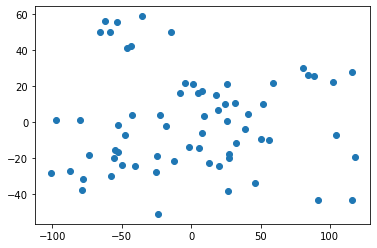

In [92]:
#plt.subplot(2,2)
import seaborn
#sns.plot()
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
v_m= pca.fit_transform(l[3].iloc[:,0:39])
plt.scatter(v_m[:,0],v_m[:,1])

In [93]:
from sklearn.preprocessing import LabelEncoder
ohe=LabelEncoder()
ohe.fit(edf.iloc[:,-1])

LabelEncoder()

In [94]:
#edf.iloc[:,-1]=ohe.transform(edf.iloc[:,-1])

In [95]:
edf

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-206.915649,100.187340,-32.213154,35.693474,-9.092731,16.664572,-5.313095,9.479670,-20.473705,6.460907,...,0.674733,-1.147056,-1.813995,-1.432564,0.856860,0.838472,2.971595,4.306870,3.671580,chiranjeevi original-
1,-168.503799,92.796013,-43.470993,44.681686,-9.913730,18.575882,-12.464251,16.839586,-20.355118,2.868820,...,3.128470,5.135781,4.589956,2.972625,5.682449,7.099750,6.227372,6.285898,5.299379,chiranjeevi original-
2,-259.355194,84.782806,-32.544975,34.884106,2.299232,14.806336,-10.628572,3.841967,-21.005394,4.796550,...,0.359363,-1.479052,0.661695,-1.770656,0.823466,-0.450124,0.577029,1.828550,2.666865,chiranjeevi original-
3,-304.515564,107.515808,-34.179028,29.284449,11.141503,11.212320,-6.000972,7.561637,-19.814968,3.140187,...,1.544027,-0.211164,0.011923,-1.396156,0.286330,-1.139802,-1.681980,0.924567,2.572811,chiranjeevi original-
4,-261.992157,84.354660,-31.479340,24.127695,-2.888325,11.604282,-7.427988,10.674010,-13.976500,10.212080,...,3.961703,1.596172,4.365419,4.963208,7.788960,6.138669,4.439319,3.514583,3.402252,chiranjeevi original-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,-362.921173,155.797058,16.103050,6.414621,12.099456,6.501877,8.527107,-1.071170,6.649951,15.201897,...,-3.749605,-5.082999,-5.294629,-2.664591,-1.787759,-2.276068,-2.999889,-3.122648,0.264279,ANR original-
358,-343.471130,115.324394,-0.216542,6.235166,5.411654,4.859774,-4.455968,-15.285277,-19.753822,-0.154982,...,2.939217,3.507010,2.976782,-1.104984,-2.105675,-0.276942,-1.666124,-2.847944,1.438521,ANR original-
359,-336.181641,128.573303,-11.967757,14.180093,4.753082,3.026453,-4.273886,-5.783473,-20.258249,0.234689,...,-0.209548,0.445950,3.123413,2.906052,0.346239,1.462624,4.063566,0.712741,0.854655,ANR original-
360,-294.176331,124.590332,-9.103840,20.237398,3.123766,7.835172,-9.851385,-5.604244,-24.307436,-0.804645,...,3.970772,0.936355,4.633698,4.619169,0.061919,1.424588,4.577943,2.558877,-0.801049,ANR original-


##preprocessing

In [96]:
x_train, x_test, y_train,y_test =train_test_split(edf.iloc[:,0:40],edf[40])

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D_t= pca.fit_transform(x_test)

In [98]:
X2D_t= pca.fit_transform(x_test)

In [99]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
262,-185.500824,104.498375,-30.875931,4.555256,-22.144226,-7.437440,-22.227219,-3.310978,-30.987427,-3.250457,...,7.883408,4.868239,0.366500,-0.365482,-0.617199,0.976343,0.943835,3.091412,1.242622,1.108209
156,-269.151917,86.059624,-28.652393,35.491375,-15.656141,-11.765816,-26.931187,3.062216,-34.695362,3.095723,...,0.909776,-0.857167,0.303303,1.183007,5.138915,1.887328,1.765002,1.802825,1.041089,1.966136
180,-273.668304,159.214386,-18.523018,24.908663,1.759204,4.496087,-17.405178,-5.299872,3.828144,-15.175689,...,1.119159,0.410479,1.351987,1.780396,-0.437551,0.631773,0.181497,1.265345,-0.123939,-1.745784
129,-227.671204,113.992546,0.092490,14.672668,0.350533,-12.107994,-15.731487,1.825028,-25.883276,2.503587,...,-1.667358,1.699728,1.593057,0.596804,0.723403,-1.820745,-2.416632,-0.695350,0.888916,0.756162
25,-288.937958,145.690659,-18.082767,22.953323,-1.656983,-4.571087,-7.499184,-8.145245,-23.856777,-4.718375,...,-0.184605,2.406788,2.234810,1.479360,0.017972,-0.991378,-2.294459,-1.589784,-2.549996,-2.379057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,-317.934418,131.395447,-14.324621,22.753757,-5.169916,-0.202610,-10.913395,-10.384647,-17.366268,-7.436780,...,1.296396,0.927855,4.781917,1.344617,-0.163965,0.178322,-1.718946,-1.349292,-2.145913,-1.135999
336,-338.320557,129.321793,3.702276,13.005278,5.637084,6.945536,6.456528,7.179736,-3.749597,-16.154877,...,-3.345630,0.444857,1.926319,0.563057,0.163643,-0.284260,-1.448740,-2.185295,2.138266,4.196628
344,-358.654114,158.051224,20.354168,17.369867,14.680462,5.595888,11.167434,1.127931,6.672021,11.248996,...,-3.212425,-4.743728,-4.669108,-2.595630,-1.928156,-2.393522,-2.682274,-2.818860,-0.190114,0.500800
139,-206.114105,143.238556,7.468771,20.738844,-21.971577,3.188496,-13.763108,3.712608,-6.469021,-5.283315,...,0.058955,0.513538,-0.656432,0.975710,0.876507,1.014392,-1.092384,0.387873,0.241607,0.753638


# svm

Accuracy:0.868132


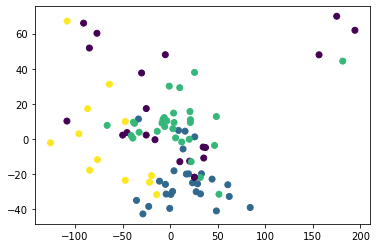

In [113]:
from sklearn import svm
clf = svm.SVC(kernel="poly", degree=3,coef0=13,  C=4)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{0:f}'.format(score))
ohe.fit(y_pred)
p=ohe.transform(y_pred)
plt.scatter(X2D_t[:, 0], X2D_t[:, 1], c=p)

In [114]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.78947368, 0.96153846, 0.95081967, 0.64516129])

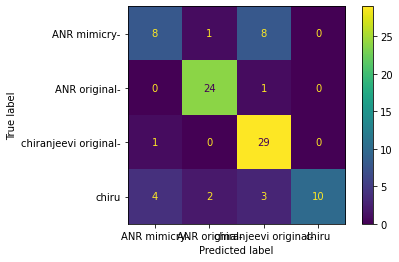

In [102]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test,y_test)  
plt.show()

# KNeighborsClassifier

Accuracy:0.714286


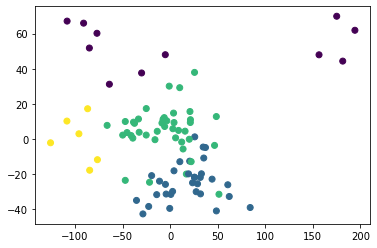

In [119]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
p=ohe.transform(y_pred)
score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{0:f}'.format(score))
plt.scatter(X2D_t[:, 0], X2D_t[:, 1], c=p);

In [120]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.81818182, 0.65625   , 0.69047619, 1.        ])

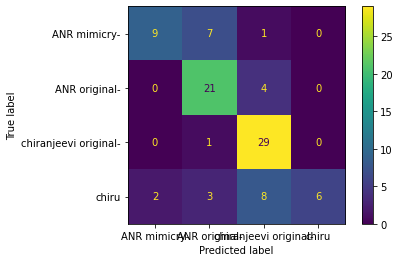

In [121]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test)  
plt.show()

In [122]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.81818182, 0.65625   , 0.69047619, 1.        ])

# Decision Tree


Accuracy:0.769231


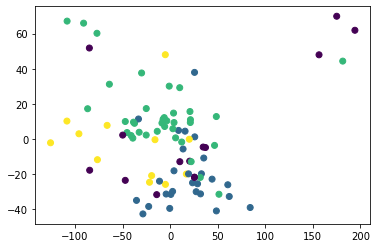

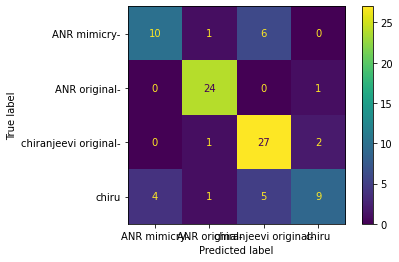

In [123]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
D_clf = clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
p=ohe.transform(y_pred)
score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{0:f}'.format(score))
plt.scatter(X2D_t[:, 0], X2D_t[:, 1], c=p)
plot_confusion_matrix(D_clf, x_test, y_test)  
plt.show()

In [124]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.71428571, 0.88888889, 0.71052632, 0.75      ])

In [36]:
import speech_recognition as sr #pip install speechRecognition
def initialrecording():
    with sr.Microphone() as source:
        print("Listening...\n")
        print("speak .. something ...\n")
        r.pause_threshold = 1
        audio = r.listen(source)
        path =str(x.iloc[i,1])+ str("\\")+ str(x.iloc[i,0]) # required path
        f= open(path,"w+")
        sf.write(path, augmented_signal, sr)
    try:
        print("Recognizing...")
        directory = "new"
        parent_dir = "F:\\project"
        path = os.path.join(parent_dir, directory)
        os.mkdir(path)
        split_wav = SplitWavAudioMubin(path, file)
        split_wav.multiple_split(min_per_split=0.2)
    except Exception as e:
        # print(e)    
        print("Say that again please...")  
        return "None"
    

In [37]:
def recording(audio):
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
        print(clf.predict(mfccs_scaled_features))
        speak(str(clf.predict(mfccs_scaled_features)))

In [38]:
from pydub import AudioSegment
import math

class SplitWavAudioMubin():
    def __init__(self, folder, filename):
        self.folder = folder
        self.filename = filename
        self.filepath = folder + '\\' + filename
        
        self.audio = AudioSegment.from_wav(self.filepath)
    
    def get_duration(self):
        return self.audio.duration_seconds
    
    def single_split(self, from_min, to_min, split_filename):
        t1 = from_min * 60 * 1000
        t2 = to_min * 60 * 1000
        split_audio = self.audio[t1:t2]
        split_audio.export(self.folder + '\\' + split_filename, format="wav")
        
    def multiple_split(self, min_per_split):
        total_mins = math.ceil(self.get_duration() / 60)
        for i in range(0, total_mins, min_per_split):
            split_fn = str(i) + '_' + self.filename
            self.single_split(i, i+min_per_split, split_fn)
            print(str(i) + ' Done')
            if i == total_mins - min_per_split:
                print('All splited successfully')

In [40]:
#edf.to_csv(r'F:\project\my_data.csv', index=False)

#1Testing the model

In [70]:
input_path="F:\project\chiranjeevi original\chiranjeevi original-10.wav"
audio, sample_rate=librosa.load(input_path)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
l=[mfccs_scaled_features]
clf.predict(l)

array(['chiranjeevi original-'], dtype=object)

In [145]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

skf.get_n_splits(edf.iloc[:,0:40], edf.iloc[:,-1])
y1=[]
for i,j in skf.split(edf.iloc[:,0:40],edf.iloc[:,-1]):
    x_traink=edf.iloc[i,0:40]
    y_traink=edf.iloc[i,-1]
    x_testk=edf.iloc[j,0:40]
    y_testk=edf.iloc[j,-1]
    from sklearn import svm
    clf = svm.SVC(kernel="poly", degree=3,  C=4)
    clf.fit(x_traink, y_traink)
    y_predk=clf.predict(x_testk)
    score = metrics.accuracy_score(y_testk,y_predk)
    y1.append(score)
    
for i in range(len(y1)):
    print("accuracy SVM in {} fold  is {}:".format(i,y1[i]))
    
    

accuracy SVM in 0 fold  is 0.8082191780821918:
accuracy SVM in 1 fold  is 0.8904109589041096:
accuracy SVM in 2 fold  is 0.6805555555555556:
accuracy SVM in 3 fold  is 0.8194444444444444:
accuracy SVM in 4 fold  is 0.7083333333333334:


In [156]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

skf.get_n_splits(edf.iloc[:,0:40], edf.iloc[:,-1])
y2=[]
for i,j in skf.split(edf.iloc[:,0:40],edf.iloc[:,-1]):
    x_traink=edf.iloc[i,0:40]
    y_traink=edf.iloc[i,-1]
    x_testk=edf.iloc[j,0:40]
    y_testk=edf.iloc[j,-1]
    from sklearn import tree
    D_clf = tree.DecisionTreeClassifier()
    D_clf.fit(x_traink, y_traink)
    y_predk=D_clf.predict(x_testk)
    score = metrics.accuracy_score(y_testk,y_predk)
    y2.append(score)
for i in range(len(y2)):
    print("accuracy of Decission Tree in {} fold  is: {}".format(i+1,y2[i]))
    
    

accuracy of Decission Tree in 1 fold  is: 0.7945205479452054
accuracy of Decission Tree in 2 fold  is: 0.9041095890410958
accuracy of Decission Tree in 3 fold  is: 0.6666666666666666
accuracy of Decission Tree in 4 fold  is: 0.6527777777777778
accuracy of Decission Tree in 5 fold  is: 0.6944444444444444


In [161]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

skf.get_n_splits(edf.iloc[:,0:40], edf.iloc[:,-1])
y3=[]
for i,j in skf.split(edf.iloc[:,0:40],edf.iloc[:,-1]):
    x_traink=edf.iloc[i,0:40]
    y_traink=edf.iloc[i,-1]
    x_testk=edf.iloc[j,0:40]
    y_testk=edf.iloc[j,-1]
    from sklearn.neighbors import KNeighborsClassifier
    clf1 = KNeighborsClassifier(n_neighbors=23)
    clf1.fit(x_traink, y_traink)
    y_predk=clf1.predict(x_testk)
    score = metrics.accuracy_score(y_testk,y_predk)
    y3.append(score)
for i in range(len(y3)):
    print("accuracy of KNN in {} fold  is {}:".format(i+1,y3[i]))
    
    

accuracy of KNN in 1 fold  is 0.7808219178082192:
accuracy of KNN in 2 fold  is 0.9041095890410958:
accuracy of KNN in 3 fold  is 0.6805555555555556:
accuracy of KNN in 4 fold  is 0.7638888888888888:
accuracy of KNN in 5 fold  is 0.6527777777777778:


In [162]:

k=pd.DataFrame(index =["accuracy of {} fold".format(i+1)  for i in range(len(y3))],columns=["SVM","KNN","DECISSION_TREES"])

In [163]:
k.SVM =y1
k.KNN =y2
k.DECISSION_TREES =y3

In [164]:
k

,SVM,KNN,DECISSION_TREES
accuracy of 1 fold,0.808219,0.794521,0.780822
accuracy of 2 fold,0.890411,0.904110,0.904110
accuracy of 3 fold,0.680556,0.666667,0.680556
accuracy of 4 fold,0.819444,0.652778,0.763889
accuracy of 5 fold,0.708333,0.694444,0.652778
